In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import numpy as np
from scipy.io import savemat, loadmat
import os

from python_scripts import important_functions

In [12]:
SNR = np.arange(40,101,10)
std_dev_list = [0.0015, 0.0012, 0.001, 0.00087, 0.00075, 0.00067, 0.0006]
num_realizations = 100

print(SNR)

[ 40  50  60  70  80  90 100]


## Pre coil combination

In [4]:
# Write down the filepath prefix to the data and to save the RMSE data
filepath = '/rds/general/user/kb4317/home/coil_combination_project/simulated_phantom_data'

In [5]:
#load the npy file
filepath_data = filepath + '/SNR_' + str(SNR[0])
os.chdir(filepath_data)
noisy_phantom = np.load('noisy_phantom_SNR_' + str(SNR[0]) + '_std_dev_' + str(std_dev_list[0]) +'_realization_'+ 
                    str(1) + '.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/rds/general/user/kb4317/home/coil_combination_project/simulated_phantom_data/SNR_5'

In [14]:
noisy_phantom.shape
print(np.moveaxis(noisy_phantom, [0,1,2,3], [0,1,3,2]).shape)

(320, 320, 12, 8)


In [15]:
for s in range(len(SNR)):
    for r in range(num_realizations):
        filepath_data = filepath + '/SNR_' + str(SNR[s])
        os.chdir(filepath_data)

        #load the npy file
        noisy_phantom = np.load('noisy_phantom_SNR_' + str(SNR[s]) + '_std_dev_' + str(std_dev_list[s]) +'_realization_'+ 
                str(r) + '.npy')

        #rearrange data to make it relevant to the IMPA function and save it as a mat file
        noisy_phantom_axorg = np.moveaxis(noisy_phantom, [0,1,2,3], [0,1,3,2])
        noisy_phantom_axorg = np.reshape(noisy_phantom_axorg, (noisy_phantom_axorg.shape[0], noisy_phantom_axorg.shape[1], noisy_phantom_axorg.shape[2], 1, noisy_phantom_axorg.shape[3]))
        
        #save the .npy file as a .mat file for IMPA
        savemat('noisy_phantom_SNR_' + str(SNR[s]) + '_std_dev_' + str(std_dev_list[s]) +'_realization_'+ 
                str(r) + '.mat', {'noisy_phantom': noisy_phantom_axorg})

## Post coil combination - load in the .mat files and analyze phase preservation

In [17]:
SNR = np.arange(10,101,10)
std_dev_list = [0.006, 0.003, 0.002, 0.0015, 0.0012, 0.001, 0.00087, 0.00075, 0.00067, 0.0006]

filepath = r'/rds/general/user/kb4317/home/coil_combination_project/simulated_phantom_data'
os.chdir(filepath)

gt_image = np.load("simulated_phantom_12pcbssfp_coil_images.npy")

for s in range(len(SNR)):
    print(s)
    bias = []
    variance = []
    
    #Also save the phase data I get so that I can recalculate the RMSE later if I want to
    #phase_0th_coil_array = np.empty((2000,12,100), dtype = 'float64')  #12 is for number of phase cycles, 100 is for the number of samples, 2000 is for the number of pixels 
    #phase_coil_combined_array = np.empty((2000,12,100), dtype = 'float64')

    for r in range(num_realizations):
        
        filepath_data = filepath + '/SNR_' + str(SNR[s])
        os.chdir(filepath_data)
        
        IMPA_results = loadmat('coil_combined_image_impa_SNR_' + str(SNR[s]) + '_realization_' + str(r) + '.mat')
        
        coil_combined_image = IMPA_results['IMPA']
        
        #print(coil_combined_image.shape)
        
        # Calculate the RMSE - working
        bias_temp, variance_temp, phase_0th_coil, phase_coil_combined = important_functions.bias_variance_simulated_phantom(gt_image, coil_combined_image)
        bias.append(bias_temp)
        variance.append(variance_temp)
        
        #phase_0th_coil_array[:,:,r] = phase_0th_coil
        #phase_coil_combined_array[:,:,r] = phase_coil_combined
        
        print(r)
        
    # Save the RMSE and phase data
    os.chdir(filepath)
    np.save('bias1_impa_SNR_' + str(SNR[s]) + '.npy', np.array(bias)) #should be 100 elements long
    np.save('variance1_impa_SNR_' + str(SNR[s]) + '.npy', np.array(variance)) #should be 100 elements long
    # Note that this phase data is in radians and phase unwrapping has already been conducted. The only thing that hasn't
    # been done is that the phase of the 0th coil has not been subtracted from the phase of the combined coil - this 
    # subtraction is done to calculate the RMSE and should be done to replicate the RMSE results.
    #np.save('phase_0th_coil_impa_SNR_' + str(SNR[s]) + '.npy', phase_0th_coil_array)
    #np.save('phase_coil_combined_impa_SNR_' + str(SNR[s]) + '.npy', phase_coil_combined_array)                

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


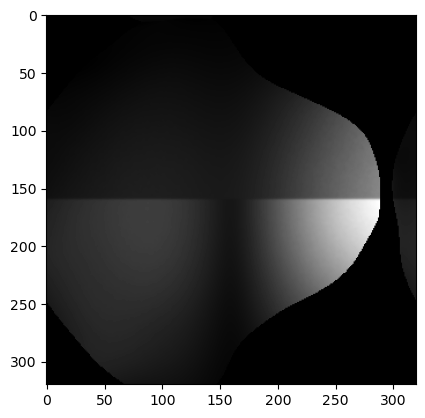

In [14]:
plt.figure()
plt.imshow(np.abs(gt_image[:,:,7,0]), cmap = 'gray')